***Multiple Linear Regression Model Using Cross-Validation Split***

Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read Data
- Reads the dataset from a CSV file named 'DataSet.csv' into a pandas DataFrame named data.

In [2]:
data=pd.read_csv('DataSet.csv')

Data Preprocessing
- Extracts features (X) and target (Y) from the DataFrame.
- The .values attribute converts DataFrame columns into numpy arrays.

In [3]:
X=data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].values
Y=data['Chance of Admit '].values

Cross-Validation Setup
- Sets up a KFold object with 5 splits (n_splits=5).

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=5)

Model Selection and Evaluation
- Import LinearRegression from scikit-learn
- Perform cross-validation using cross_val_score and compute scores for each fold.

In [5]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
scores=cross_val_score(reg,X,Y,cv=kf)
print(scores)

[0.67763918 0.79424809 0.86447645 0.81935698 0.89828691]


In [6]:
np.mean(scores)

0.8108015220863889

Data Splitting
- Split the data into two parts (data1 and data2) based on the cross_val_scores obtained
- data1 contains rows from index 101 onwards, while data2 contains rows up to index 100.

In [7]:
data1=data.iloc[101: , : ]
data2=data.iloc[ :101, : ]

Data Extraction
- Extract Features and Response from the two datasets (data1 and data2)

In [8]:
X1=data1[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].values
Y1=data1['Chance of Admit '].values
X2=data2[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']].values
Y2=data2['Chance of Admit '].values

Training the Model
- Train a linear regression model (reg) to the dataset(data1)

In [9]:
reg.fit(X1,Y1)

LinearRegression()

Evaluate Accuracy
- Evaluate the accuracy of our model using score function

In [10]:
print("Accuracy Percentage: ", round(((reg.score(X1,Y1))*100),2), "%")

Accuracy Percentage:  87.0 %


Plotting the best-fit line in the graph

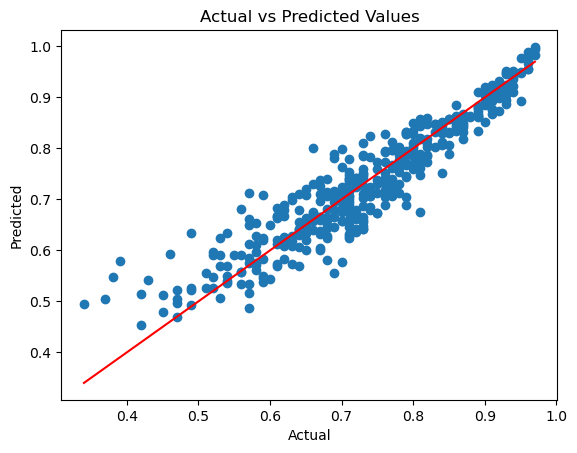

In [11]:
Y_pred = reg.predict(X1)

plt.scatter(Y1, Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.plot([min(Y1), max(Y1)], [min(Y1), max(Y1)], color='red')
plt.show()